Do neighbouring states rate the beers more favourably or not compared to non neighbouring states?
Mapping the beer appreciation of geographically maybe? Eg for Californian beer, there is a concentration of enjoyment in California compared to other states.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
US_ratings = pd.read_csv('../../USData/BA_US_states_all.csv')

In [4]:
#csv file containing all the states and their neighbouring states
#empty list for states that have no neighbours (e.g Alazka, Hawaii)
neighbours_df = pd.read_csv('../../additionalData/bordering_states.csv', dtype={'state':'string', 
                                                                          'neighbours': 'string'})
neighbours_df["neighbours"] = neighbours_df["neighbours"].fillna("").apply(lambda x: x.split(";") if x else [])

neighbours_df.head(3)

,state,neighbours,nb_neighbours
0,Alabama,"[Florida, Georgia, Mississippi, Tennessee]",4
1,Alaska,[],0
2,Arizona,"[California, Colorado, Nevada, New Mexico, Utah]",5


In [5]:
neighbours = neighbours_df.loc[neighbours_df['state'] == 'Texas', 'neighbours'].values[0]
print(neighbours)

['Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma']


In [6]:
# Calculate and return the average ratings for in state, its neighbours, and non-neighbors
def calculate_state_ratings(state, ratings, neighbours_df):
    # Get the neighbours for the given state
    neighbours = neighbours_df.loc[neighbours_df['state'] == state, 'neighbours'].values[0]
    
    # Get all ratings for the beers from the state of interest
    state_ratings = ratings[ratings['beer_state'] == state]
    
    # Ratings for in state, neighbours and non-neighbours
    in_state_ratings = state_ratings[state_ratings['user_state'] == state]['rating']
    neighbours_ratings = state_ratings[state_ratings['user_state'].isin(neighbours)]['rating']
    non_neighbours_ratings = state_ratings[~state_ratings['user_state'].isin(neighbours) & (state_ratings['user_state'] != state)]['rating']
    
    # Calculate the average ratings while considering the fact there may not be any states present and average is None
    state_avg = state_ratings['rating'].mean() if not state_ratings.empty else None  # Calculate the state's average rating for all beers
    neighbours_avg = neighbours_ratings.mean() if not neighbours_ratings.empty else None
    non_neighbours_avg = non_neighbours_ratings.mean() if not non_neighbours_ratings.empty else None
    
    return state_avg, neighbours_avg, non_neighbours_avg

# List of all states
states = US_ratings['user_state'].unique()

# Store results
ratings_results = []

# Loop through all states and calculate average ratings using function above
# Creating dictionary with all averages
for state in states:
    print(state)
    state_avg, neighbours_avg, non_neighbours_avg = calculate_state_ratings(state, US_ratings, neighbours_df)
    ratings_results.append({
        'state': state,
        'state_avg': state_avg,
        'neighbours_avg': neighbours_avg,
        'non_neighbours_avg': non_neighbours_avg
    })

# Convert results to DataFrame
ratings_df = pd.DataFrame(ratings_results)

# Print the results (just showing the first 3 rows)
print(ratings_df.head(3))


North Carolina
Wisconsin
Illinois
New York
Missouri
Pennsylvania
Michigan
Oklahoma
Arizona
California
Maryland
Florida
Virginia
Georgia
Washington
Iowa
Minnesota
New Jersey
Oregon
South Carolina
Texas
Massachusetts
Colorado
Indiana
Alaska
Idaho
Ohio
Nebraska
Tennessee
Nevada
Kansas
Louisiana
South Dakota
New Hampshire
Connecticut
Mississippi
West Virginia
Delaware
Maine
Vermont
Rhode Island
Kentucky
Arkansas
Wyoming
Alabama
New Mexico
North Dakota
Montana
Utah
Hawaii
            state  state_avg  neighbours_avg  non_neighbours_avg
0  North Carolina   3.898341        3.863558            3.896244
1       Wisconsin   3.600401        3.680441            3.472127
2        Illinois   4.009972        4.012173            4.024161


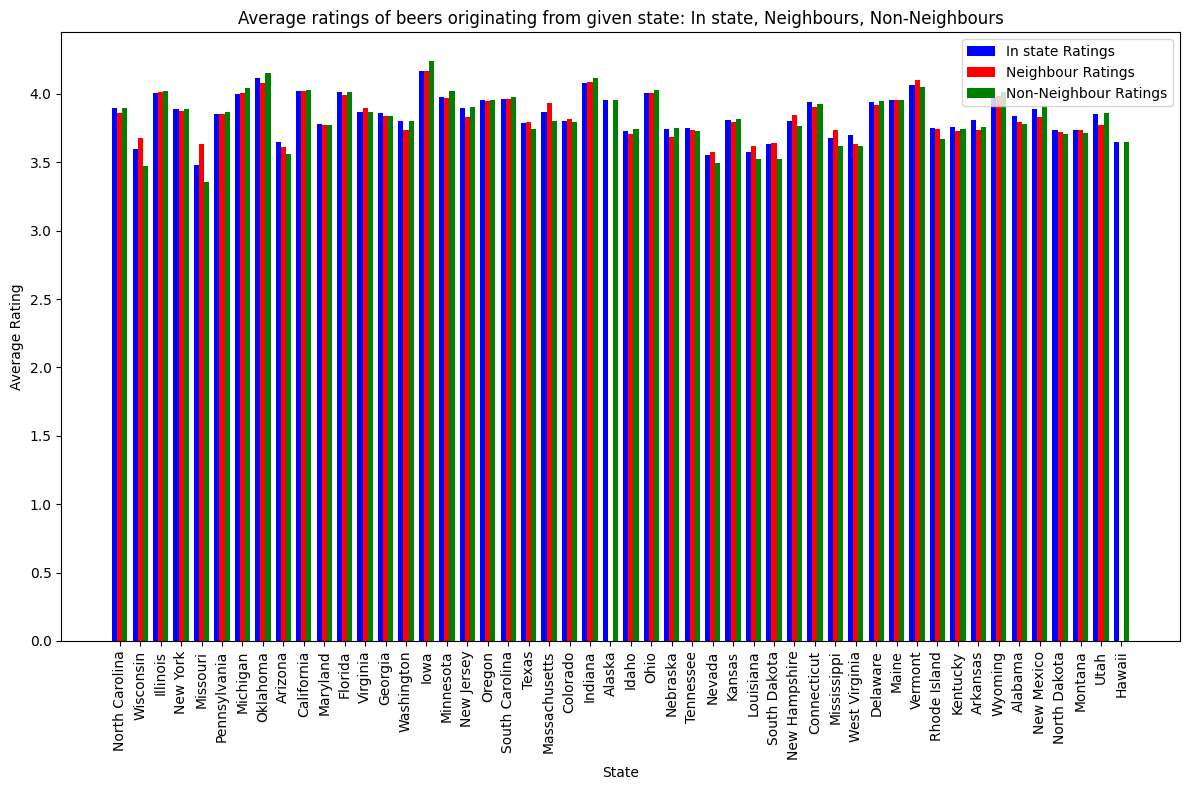

In [7]:
plt.figure(figsize=(12, 8))

bar = 0.25
index = np.arange(len(ratings_df))

#placing bars for each location of ratings next to each other
plt.bar(index, ratings_df['state_avg'], bar, label='In state Ratings', color='blue')
plt.bar(index + bar, ratings_df['neighbours_avg'], bar, label='Neighbour Ratings', color='red')
plt.bar(index + 2 * bar, ratings_df['non_neighbours_avg'], bar, label='Non-Neighbour Ratings', color='green')
plt.xticks(index + bar, ratings_df['state'], rotation=90)
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Average ratings of beers originating from given state: In state, Neighbours, Non-Neighbours')
plt.legend()
plt.tight_layout()
plt.show()


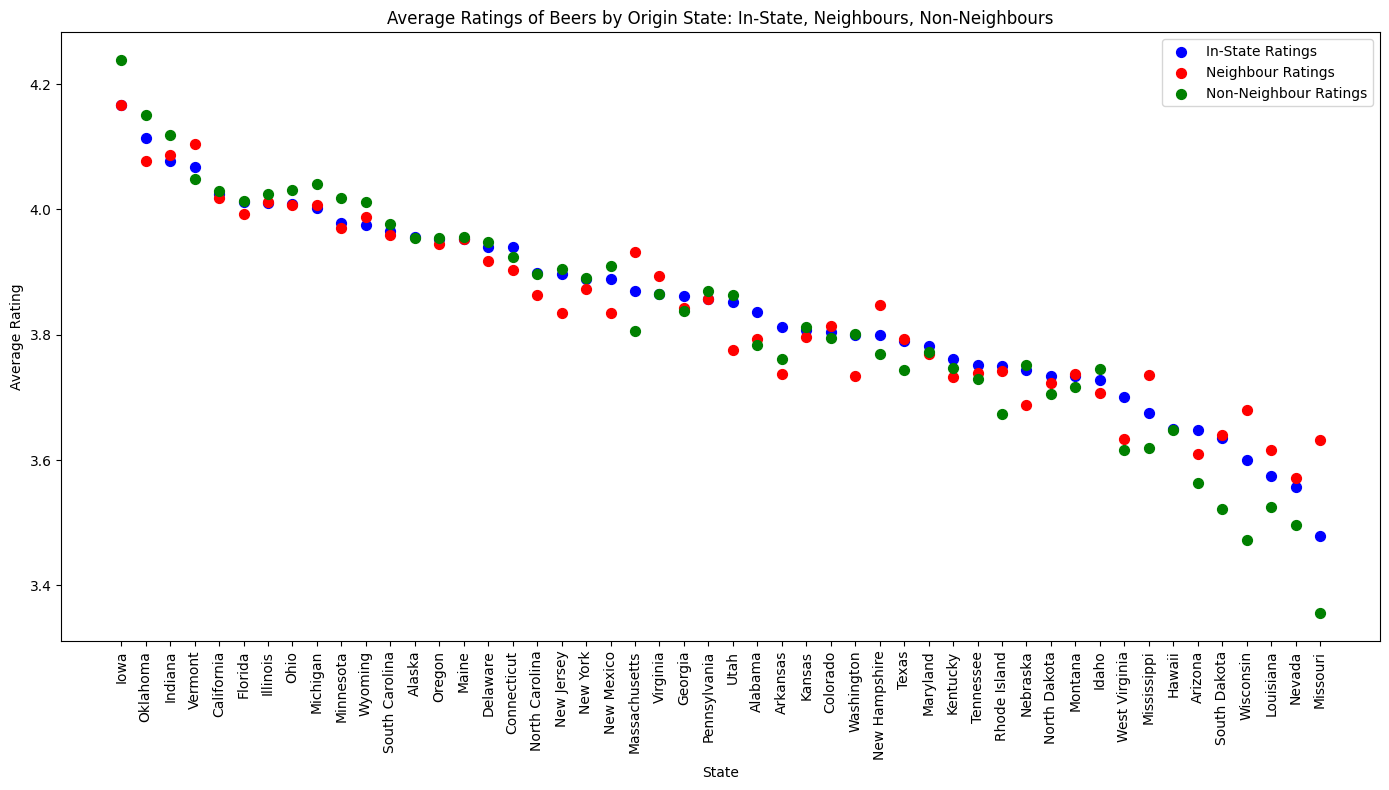

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by in_state_avg in descending order
ratings_df = ratings_df.sort_values(by='state_avg', ascending=False).reset_index(drop=True)

# Set figure size
plt.figure(figsize=(14, 8))

# Define the position of each state on the x-axis
index = np.arange(len(ratings_df))

# Plot dots for each rating category
plt.scatter(index, ratings_df['state_avg'], color='blue', label='In-State Ratings', s=50)
plt.scatter(index, ratings_df['neighbours_avg'], color='red', label='Neighbour Ratings', s=50)
plt.scatter(index, ratings_df['non_neighbours_avg'], color='green', label='Non-Neighbour Ratings', s=50)

# Add x-ticks and labels
plt.xticks(index, ratings_df['state'], rotation=90)
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Beers by Origin State: In-State, Neighbours, Non-Neighbours')
plt.legend()

# Layout adjustment for clarity
plt.tight_layout()

# Show plot
plt.show()


Analysis on whether the neighbouring states rate differently than non neighbours

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the count of ratings for each category
ratings_df['in_state_count'] = ratings_df['state'].apply(
    lambda state: US_ratings[(US_ratings['user_state'] == state) & (US_ratings['beer_state'] == state)].shape[0]
)
ratings_df['neighbours_count'] = ratings_df.apply(
    lambda row: US_ratings[(US_ratings['user_state'].isin(row['neighbours'])) & (US_ratings['beer_state'] == row['state'])].shape[0], axis=1
)
ratings_df['non_neighbours_count'] = ratings_df.apply(
    lambda row: US_ratings[(~US_ratings['user_state'].isin(row['neighbours'])) & 
                           (US_ratings['user_state'] != row['state']) &
                           (US_ratings['beer_state'] == row['state'])].shape[0], axis=1
)

# Sort by descending in_state_avg for better visualization
ratings_df = ratings_df.sort_values(by='state_avg', ascending=False).reset_index(drop=True)

# Set up the plot
plt.figure(figsize=(14, 8))
index = np.arange(len(ratings_df))

# Plot each group with size based on the count of ratings
plt.scatter(index, ratings_df['state_avg'], color='blue', s=ratings_df['in_state_count'] * 5, label='In-State Ratings')
plt.scatter(index, ratings_df['neighbours_avg'], color='red', s=ratings_df['neighbours_count'] * 5, label='Neighbour Ratings')
plt.scatter(index, ratings_df['non_neighbours_avg'], color='green', s=ratings_df['non_neighbours_count'] * 5, label='Non-Neighbour Ratings')

# Customize plot labels and legend
plt.xticks(index, ratings_df['state'], rotation=90)
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Beers by Origin State: In-State, Neighbours, Non-Neighbours')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


KeyError: 'neighbours'